In [176]:
%reset -f

100%|█████████████████████████████████████████████████████████████████████| 2400/2400 [13:47<00:00,  2.90it/s]


In [177]:
%connect_info

{
  "shell_port": 42047,
  "iopub_port": 54543,
  "stdin_port": 48145,
  "control_port": 37743,
  "hb_port": 52205,
  "ip": "127.0.0.1",
  "key": "953e7956-f11489504407e67a97e8e3fe",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-5c895cf5-52b6-4ae5-96f7-5eb12ddedb11.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [178]:
### check the status of the port
# sudo ls -la /dev/ 
### must be 666=rw all
# !groups trix_arch
### must be group tty

In [179]:
### Use in terminal
# sudo chmod 666 /dev/ttyACM0
### or RUN here
# !xfce4-terminal -e "sudo chmod 666 /dev/ttyACM0 "

In [180]:
##### Try this if previos cell does not work
###-----------------------
### Use in terminal
# sudo usermod -a -G tty $USER
### or RUN here
# !xfce4-terminal -e "sudo usermod -a -G tty $USER"

In [181]:
#######################################################
#######################################################

# Reading is done from arduino Uno via post ttyACMO
# The reading frequecny is 5Hz (200ms)
# the 1st 7/10 samples should be thruwn away 
# bcoz of bad data format

# for each reading change:
#     dir_2_save = "run0/"
#     label = "sampleX"
#     add_label = "1"
#     env_condition = "room"
#     N_of_readings = 10 #=2sec

#######################################################
#######################################################

In [182]:
import serial
from datetime import datetime
import time
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
dir_2_save = "run5_fordemo/"

In [184]:
# label = "samplaX"
# add_label = "1"
# env_condition = "room"
# N_of_readings = 50 #5Hz=200ms : 10 -> 2sec

### ALSO delay time.sleep() is added
label = "beer"
add_label = "3"
env_condition = "roomlecture"
N_of_readings = 10*60*4 #10Hz 60sec 4min

In [185]:
path_base = "/home/trix_arch/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
pathW = path_base + dir_2_save
os.chdir(pathW)
os.getcwd()

'/home/igor_trix/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/run5_fordemo'

In [186]:
serial_port = '/dev/ttyACM0'
baud_rate = 9600


pbar = tqdm(total=N_of_readings)
GGS_list = []
init_time = round(time.time(),3)*1000


    
with serial.Serial(serial_port, baud_rate) as ser:
    for cc1 in tqdm(range(10)):
        line_z = ser.readline();
        line_dec_z = line_z.decode("utf-8")
    while len(GGS_list) < N_of_readings:
        line = ser.readline();
        line_dec = line.decode("utf-8") #ser.readline returns a binary, convert to string
        lst0 = line_dec.split(",")
        lst1 = [int(x) for x in lst0]
        if len(lst1)==6:
            GGS_list += [[int(round(time.time(),3)*1000-init_time)] + lst1]
            pbar.update(1)
            plt.plot
#             print(line_dec);

100%|█████████████████████████████████████████████████████████████████████| 2400/2400 [05:15<00:00,  7.62it/s]

In [187]:
GGS_list

[[1087, 523, 225, 558, 382, 28, 32],
 [1214, 522, 225, 558, 381, 28, 32],
 [1345, 522, 226, 558, 381, 28, 32],
 [1477, 522, 225, 558, 381, 28, 32],
 [1608, 522, 225, 557, 380, 28, 32],
 [1739, 522, 225, 557, 380, 28, 32],
 [1870, 522, 225, 557, 379, 28, 32],
 [2001, 523, 226, 558, 379, 28, 32],
 [2132, 522, 225, 557, 379, 28, 32],
 [2267, 523, 225, 558, 379, 27, 31],
 [2394, 523, 225, 557, 379, 27, 31],
 [2525, 522, 225, 557, 378, 27, 31],
 [2656, 522, 225, 558, 378, 27, 31],
 [2787, 522, 225, 557, 378, 27, 31],
 [2918, 522, 225, 557, 378, 27, 31],
 [3049, 521, 224, 557, 378, 27, 31],
 [3180, 522, 225, 557, 378, 27, 31],
 [3312, 522, 224, 557, 378, 27, 31],
 [3443, 522, 224, 557, 378, 27, 31],
 [3574, 522, 224, 557, 377, 27, 31],
 [3705, 522, 224, 557, 378, 27, 31],
 [3836, 521, 225, 557, 377, 27, 31],
 [3967, 522, 225, 557, 377, 27, 31],
 [4098, 521, 224, 556, 377, 27, 31],
 [4229, 522, 225, 557, 377, 27, 31],
 [4360, 522, 224, 557, 377, 27, 31],
 [4491, 522, 225, 557, 377, 27, 31],
 

In [188]:
GGS_df = pd.DataFrame(GGS_list, columns=["time_ms", "B102NO2", "B302C2H5OH", "B502VOC", "B702CO", "TdegC", "RH"])


In [189]:
filename_to_save = "./%s_%s_%s_%s.csv" % (label, add_label, env_condition, datetime.now().strftime("%Y%m%d_%H%M%S"))

with open(filename_to_save, 'w') as output_file:
    GGS_df.to_csv(output_file, index=False)
    print("Saved to file: " + filename_to_save)
    print("Under the path: " + pathW)

Saved to file: ./beer_3_roomlecture_20211221_115234.csv
Under the path: /home/trix_arch/IIVspace/DataSc/DataCamp2021/DSR_B28_work/DSR28_portfolio_project/Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/run5_fordemo/


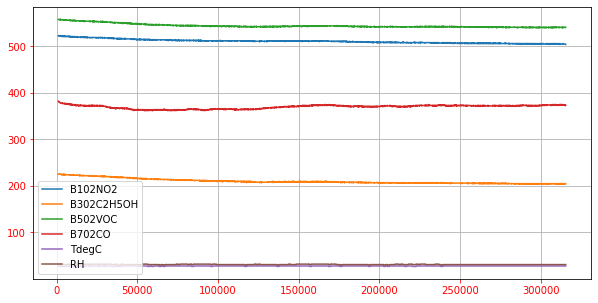

In [190]:
plt.figure(figsize=(10,5))
plt.plot(GGS_df.time_ms, GGS_df.drop('time_ms', axis=1))
plt.legend(GGS_df.drop('time_ms', axis=1).columns.to_list())
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()

In [191]:
GGS_df

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH
0,1087,523,225,558,382,28,32
1,1214,522,225,558,381,28,32
2,1345,522,226,558,381,28,32
3,1477,522,225,558,381,28,32
4,1608,522,225,557,380,28,32
...,...,...,...,...,...,...,...
2395,314945,505,204,540,374,28,31
2396,315076,505,204,541,373,28,31
2397,315208,505,204,541,374,28,31
2398,315338,505,205,541,374,28,31
